# Schizophrenia Prediction Model

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Exploring Data

(5000, 10)
              Age      Fatigue      Slowing         Pain      Hygiene  \
count  5000.00000  4756.000000  4771.000000  4758.000000  5000.000000   
mean     74.83340     0.503835     0.499524     0.499612     0.499717   
std       9.57787     0.296123     0.295365     0.294886     0.294907   
min      55.00000    -0.095115    -0.094843    -0.095771    -0.094284   
25%      67.00000     0.247056     0.245795     0.251174     0.248998   
50%      75.00000     0.506278     0.502403     0.498051     0.501223   
75%      83.00000     0.759499     0.744812     0.749946     0.751029   
max      95.00000     1.091136     1.092146     1.090027     1.086922   

          Movement  
count  5000.000000  
mean      0.499952  
std       0.289860  
min      -0.089272  
25%       0.254143  
50%       0.503340  
75%       0.741253  
max       1.088914  
                    Name  Age  Gender Marital_Status   Fatigue   Slowing  \
0         Leslie Goodwin   68  Female         Single  0.698075  0.

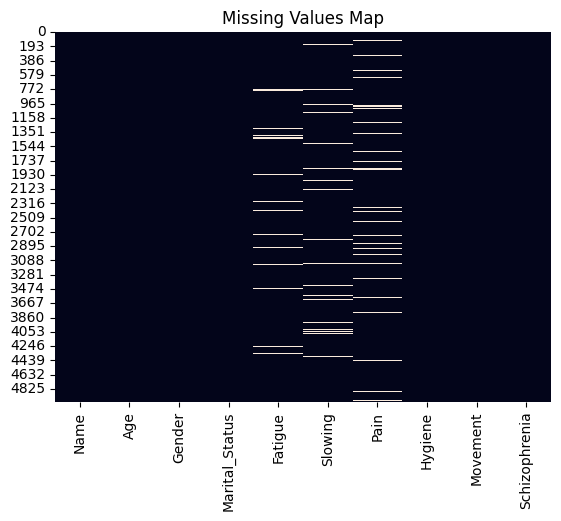

In [70]:
data = pd.read_csv('SchizophreniaSymptomnsData.csv')

print(data.shape)
print(data.describe())
print(data.head())
print(data.info())
print(data.isnull().sum())

# Visual check for missing values
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Map')
plt.show()


## Handling Missing Values

In [71]:
for col in ['Fatigue', 'Slowing', 'Pain']:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\loaiw\AppData\Local\Temp\ipykernel_15440\4083851651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\loaiw\AppData\Local\Temp\ipykernel_15440\4083851651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Encoding Labels & Feature Scaling

In [72]:
le = LabelEncoder()
for col in ['Gender', 'Marital_Status']:
    data[col] = le.fit_transform(data[col])

    scaler = StandardScaler()
numerical_cols = ['Age', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

### Correlations

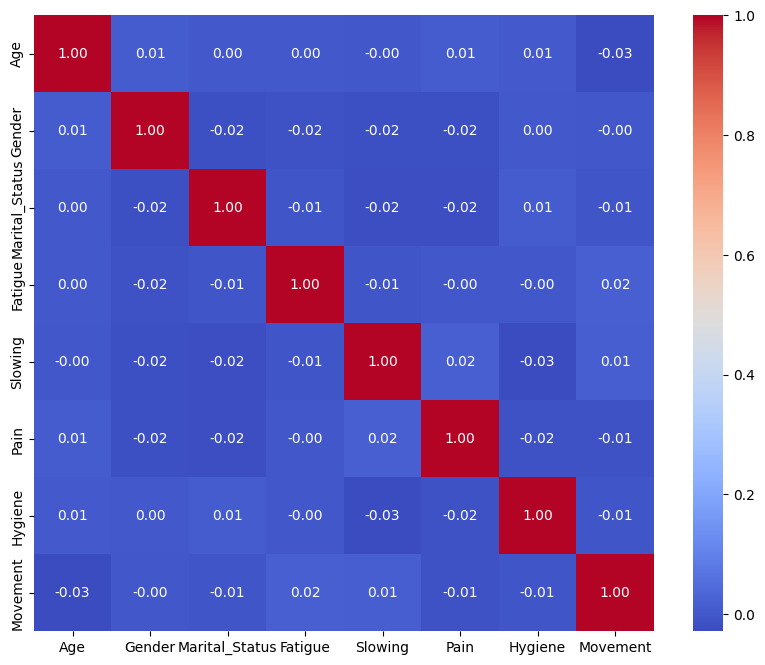

In [73]:
# Name is irrelevant
data = data.drop("Name",axis=1)

dataCorr = data
dataCorr = dataCorr.drop("Schizophrenia", axis=1)
# dataCorr['Schizophrenia'] = le.fit_transform(dataCorr['Schizophrenia'])
plt.figure(figsize=(10,8))
sns.heatmap(dataCorr.corr(), annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

## Distributions

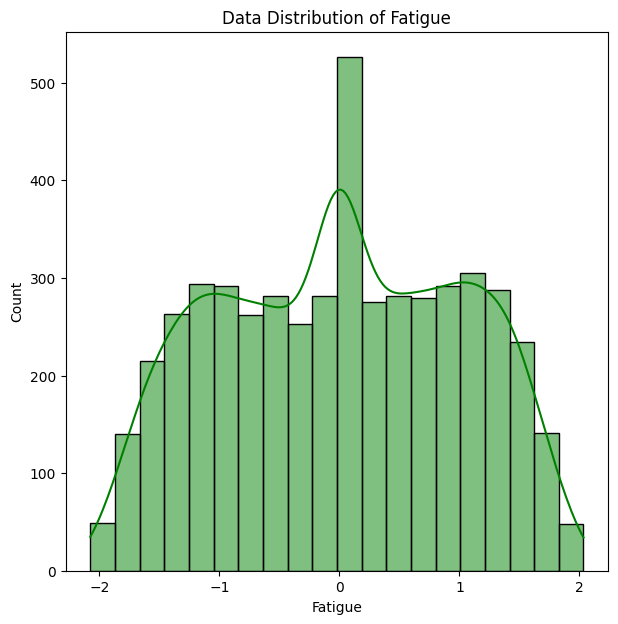

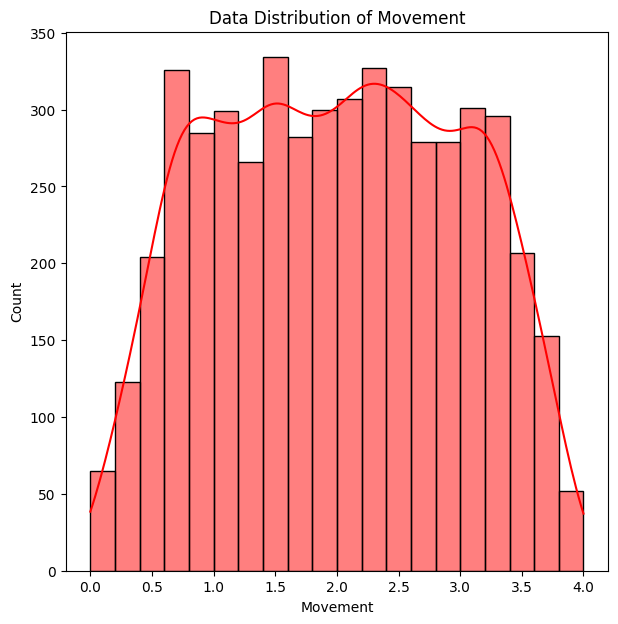

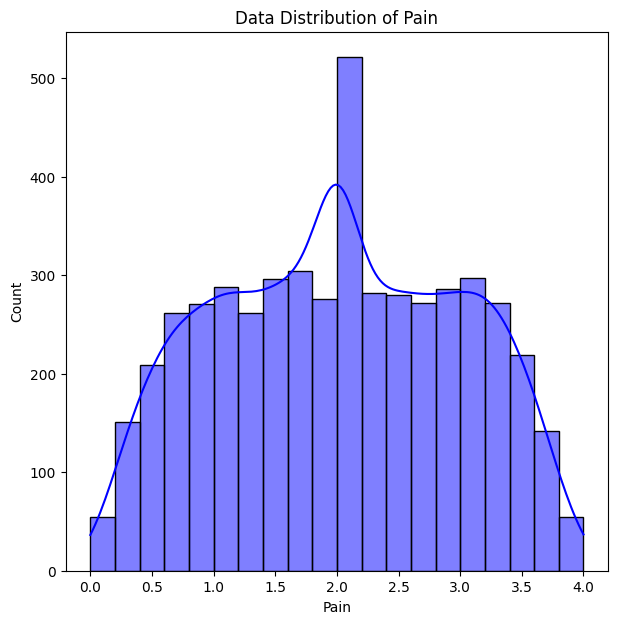

In [74]:
# Adjusting Distribution scaling from [-2:2] to [0:4]

# distribution of age 
data['Fatigue'] = scaler.fit_transform(data[['Fatigue']])
scaler = MinMaxScaler(feature_range=(0, 4))
plt.figure(figsize=(7,7))
sns.histplot(x=data["Fatigue"], kde=True, color="green", bins=20)
plt.title("Data Distribution of Fatigue")
plt.show()


# Distribution of Movement 
scaler = MinMaxScaler(feature_range=(0, 4))
data['Movement'] = scaler.fit_transform(data[['Movement']])
plt.figure(figsize=(7,7))
sns.histplot(x=data["Movement"], kde=True, color="Red", bins=20)
plt.title("Data Distribution of Movement")
plt.show()

# Distribution of Pain 
scaler = MinMaxScaler(feature_range=(0, 4))
data['Pain'] = scaler.fit_transform(data[['Pain']])
plt.figure(figsize=(7,7))
sns.histplot(x=data["Pain"], kde=True, color="Blue", bins=20)
plt.title("Data Distribution of Pain")
plt.show()

## Train Test Splitting

In [75]:
X = data[['Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']]
y = data['Schizophrenia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Smote to adjust for lower sized samples

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


## Training

In [77]:
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Feature Importance

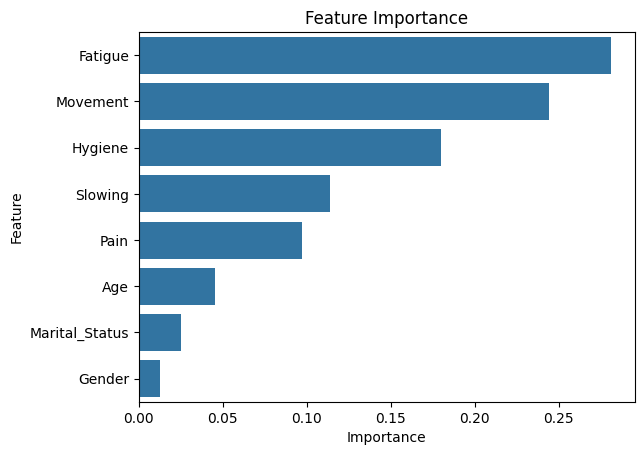

In [78]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## Evaluations

                     precision    recall  f1-score   support

 Elevated Proneness       0.93      0.92      0.93       624
     High Proneness       0.81      0.86      0.83       166
      Low Proneness       1.00      0.60      0.75        10
 Moderate Proneness       0.90      0.89      0.90       196
Very High Proneness       1.00      0.50      0.67         4

           accuracy                           0.90      1000
          macro avg       0.93      0.76      0.81      1000
       weighted avg       0.90      0.90      0.90      1000



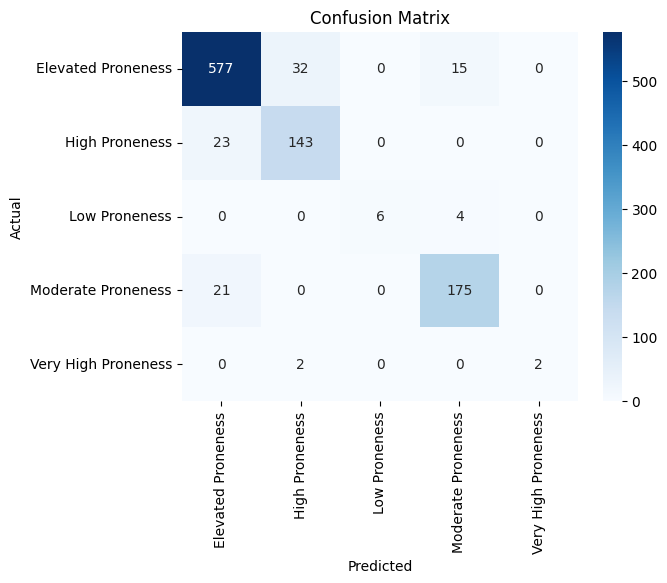

In [79]:
y_pred = model.predict(X_test)

class_labels = ['Elevated Proneness', 'High Proneness', 'Low Proneness', 'Moderate Proneness', 'Very High Proneness']
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred,)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Exporting Model

In [80]:
with open("schizoModel.pkl", 'wb') as outputFile:
    pickle.dump(model, outputFile)